<a href="https://www.kaggle.com/code/balupeddireddy/titanic-survival-prediction?scriptVersionId=127972597" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

##### Question or problem definition.
* 1. Acquire training and testing data.
* 1. Wrangle, prepare, cleanse the data.
* 1. Analyze, identify patterns, and explore the data.
* 1. Model, predict and solve the problem.
* 1. Visualize, report, and present the problem solving steps and final solution.
* 1. Supply or submit the results.

###### The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.
* We may combine mulitple workflow stages. We may analyze by visualizing data.
* Perform a stage earlier than indicated. We may analyze data before and after wrangling.
* Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
* Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.

#### Brief Explanation:
* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### Workflow goals
The data science solutions workflow solves for seven major goals.

<b>Classifying</b>: We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

<b>Correlating</b>: One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

<b>Converting</b>: For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

<b>Completing</b>: Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

<b>Correcting</b>: We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

<b>Creating</b>: Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

<b>Charting</b>: How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [3]:
# For data analysis
import pandas as pd
import numpy as np
import scipy as sc
import random as rnd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Modelling
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC

### Combine Data

In [4]:
df_train = pd.read_csv(r"/kaggle/input/titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test = pd.read_csv(r"/kaggle/input/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df = pd.concat([df_train, df_test], axis = 0, ignore_index = True) # combine = [train_df, test_df]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
print("Shape of Training dataset:", df_train.shape)
print("Shape of Testing dataset:", df_test.shape)
print("Shape of Combined dataset:", df.shape)

Shape of Training dataset: (891, 12)
Shape of Testing dataset: (418, 11)
Shape of Combined dataset: (1309, 12)


### Analyze by describing data

In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

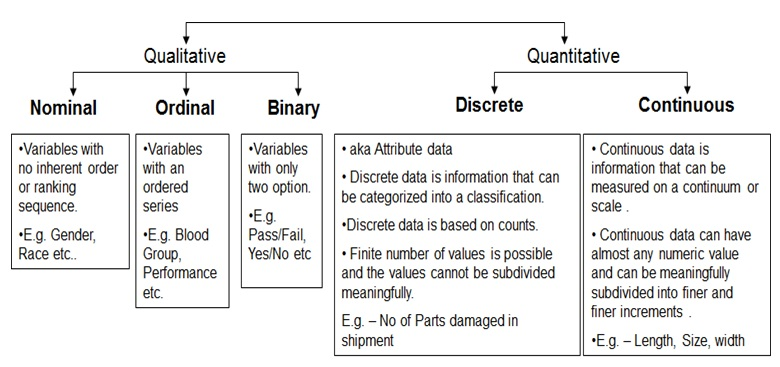

##### Which features are categorical?
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass

##### Which features are numerical?
Continous: Age, Fare. Discrete: SibSp, Parch.

<b>Note :</b> You can also consider the SibSp & Parch variables as categorical, provided the further analysis would change.

##### Which features are mixed data types?
Numerical, alphanumeric data within same feature. These are candidates for correcting goal.
* Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [17]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Early Assumtions:
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.
* Survived is a categorical feature with 0 or 1 values.
* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

Total number of passengers survived :  342 , Percentage:  0.3838383838383838
Total number of passengers not survived :  549 , Percentage:  0.6161616161616161


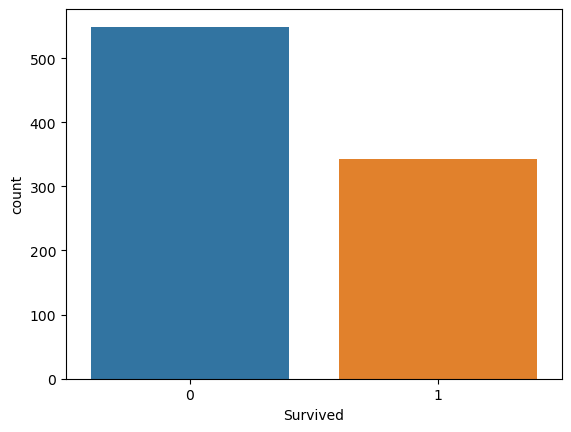

In [19]:
print("Total number of passengers survived : ", sum(df_train['Survived']==1), ', Percentage: ',sum(df_train['Survived']==1)/len(df_train))
print("Total number of passengers not survived : ", sum(df_train['Survived']==0), ', Percentage: ',sum(df_train['Survived']==0)/len(df_train))
sns.countplot(df_train, x = 'Survived')
plt.show()

### Analyze features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

* Pclass:  We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* Sex:  We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* SibSp and Parch:  These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [20]:
df_train[["Survived", "Pclass"]].groupby("Pclass").agg(['mean', 'sum', 'count', 'median', 'mad', 'std'])

Survived                                      
            mean  sum count median       mad       std
Pclass                                                
1       0.629630  136   216    1.0  0.466392  0.484026
2       0.472826   87   184    0.0  0.498523  0.500623
3       0.242363  119   491    0.0  0.367246  0.428949

In [21]:
df_train[["Survived", "Pclass"]].groupby("Pclass").agg(['mean', 'sum', 'count'])

Survived           
            mean  sum count
Pclass                     
1       0.629630  136   216
2       0.472826   87   184
3       0.242363  119   491

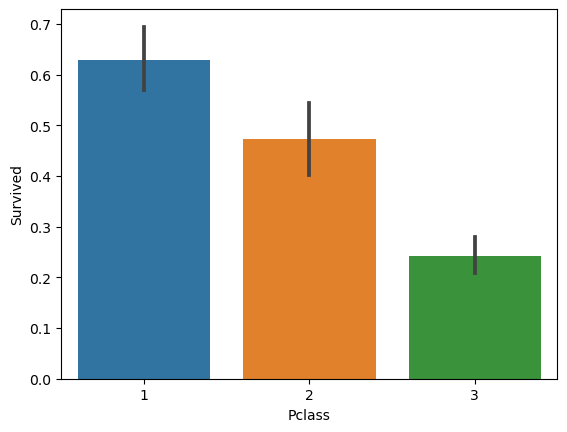

In [22]:
sns.barplot(data = df_train, x = 'Pclass', y = 'Survived')
plt.show()

* First class people survived the highest

In [23]:
df_train[["Survived", "Sex"]].groupby("Sex").agg(['mean', 'sum', 'count']).sort_values(by = ('Survived', 'mean'), ascending=False)

Survived           
            mean  sum count
Sex                        
female  0.742038  233   314
male    0.188908  109   577

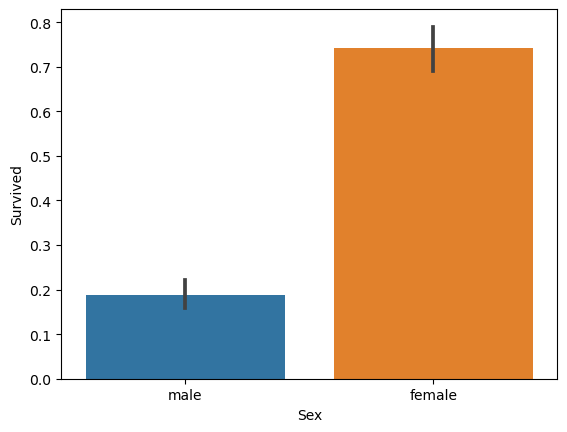

In [24]:
sns.barplot(data = df_train, x = 'Sex', y = 'Survived')
plt.show()

* Females survived the most.

In [25]:
df_train[["Survived", "SibSp"]].groupby("SibSp").agg(['mean', 'sum', 'count']).sort_values(by = ('Survived', 'mean'), ascending=False)

Survived           
           mean  sum count
SibSp                     
1      0.535885  112   209
2      0.464286   13    28
0      0.345395  210   608
3      0.250000    4    16
4      0.166667    3    18
5      0.000000    0     5
8      0.000000    0     7

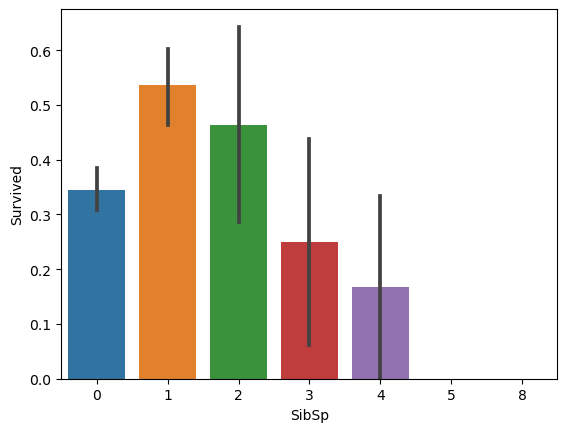

In [26]:
sns.barplot(data = df_train, x = 'SibSp', y = 'Survived')
plt.show()

* Passengers with less siblings/spouses surivived the most.

In [27]:
df_train[["Parch", "Survived"]].groupby("Parch").agg(['mean', 'sum', 'count']).sort_values(by = ('Survived', 'mean'), ascending=False)

Survived           
           mean  sum count
Parch                     
3      0.600000    3     5
1      0.550847   65   118
2      0.500000   40    80
0      0.343658  233   678
5      0.200000    1     5
4      0.000000    0     4
6      0.000000    0     1

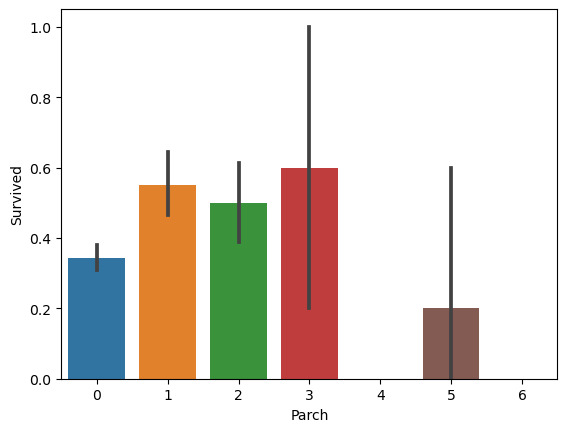

In [28]:
sns.barplot(data = df_train, x = 'Parch', y = 'Survived')
plt.show()

* The surivival rate of passengers with 1,2,3 parents/children is greater than fifty percent.

In [29]:
df_train[["Embarked", "Survived"]].groupby("Embarked").agg(['mean', 'sum', 'count']).sort_values(by = ('Survived', 'mean'), ascending=False)

Survived           
              mean  sum count
Embarked                     
C         0.553571   93   168
Q         0.389610   30    77
S         0.336957  217   644

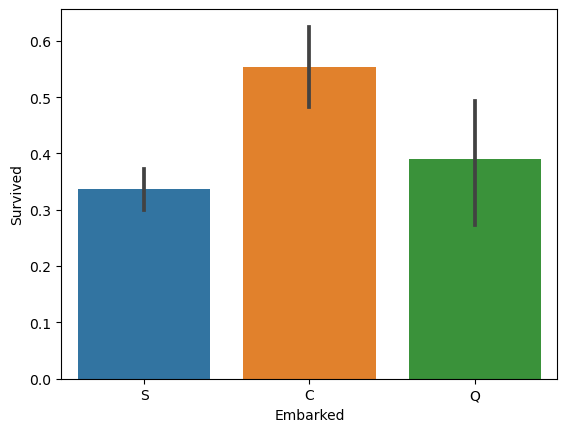

In [30]:
sns.barplot(data = df_train, x = 'Embarked', y = 'Survived')
plt.show()

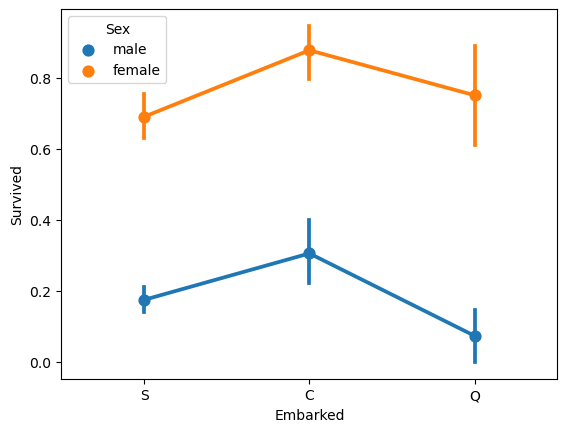

In [31]:
sns.pointplot(df_train, x = 'Embarked', y = 'Survived', hue = 'Sex')
plt.show()

The surivival rate of passengers embarked at C station is highest.

### Analyze feature distributions

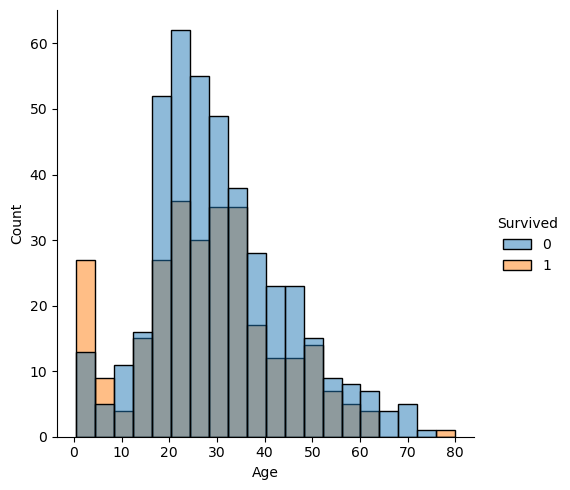

In [32]:
sns.displot(data = df_train, x = 'Age', hue = 'Survived', kind = 'hist')
plt.show()

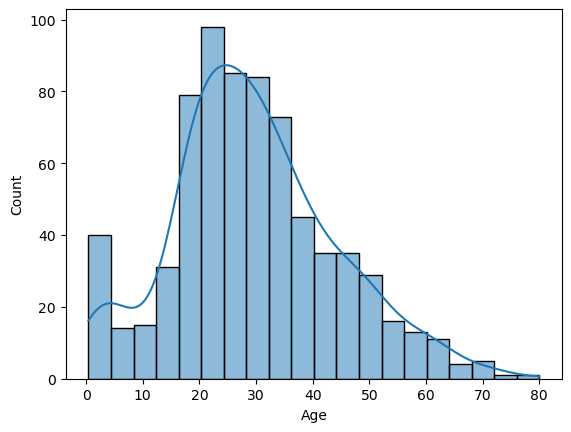

In [33]:
sns.histplot(df_train['Age'], kde = True)
plt.show()

* Infants (Age <=10) has high survival rate.
* Oldest passengers survived the tragedy.

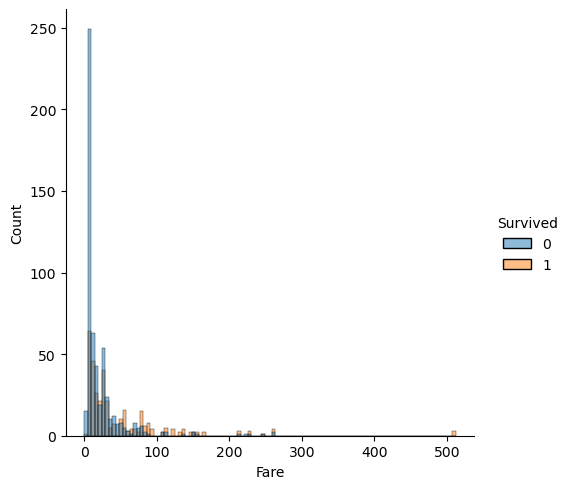

In [34]:
# plt.figure(figsize = (12,6))
sns.displot(data = df_train, x = 'Fare', hue = 'Survived', kind = 'hist')
plt.show()

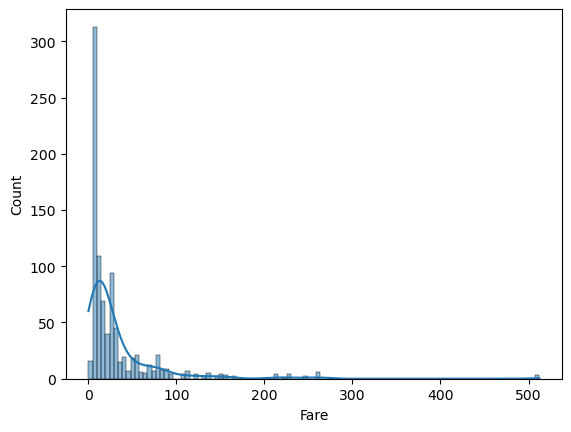

In [35]:
sns.histplot(df_train['Fare'], kde = True)
plt.show()

# Correlating categorical and numerical features
need to work

### Wrangle data
We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

In [36]:
df.duplicated(keep=False).value_counts()

False    1309
dtype: int64

#### Correcting by dropping features
* Drop 'Cabin' Feature from the datasets, since it has high percentage of missing values.

In [37]:
df_train.drop(['Cabin', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
df_test.drop(['Cabin', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
df.drop(['Cabin', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [38]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


#### Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. 

In [39]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [40]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [41]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [42]:
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [43]:
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
df_test['Title'] = df_test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_test['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

<Figure size 640x480 with 0 Axes>

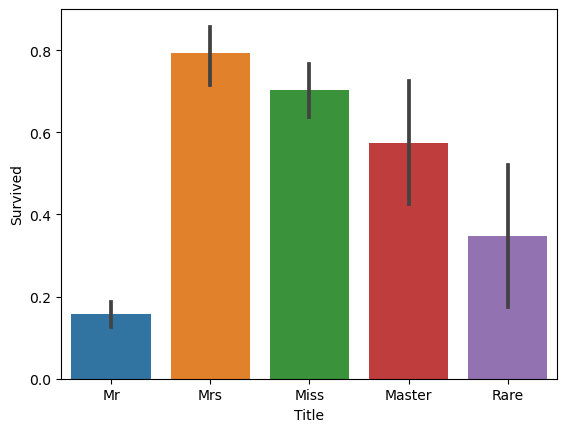

<Figure size 640x480 with 0 Axes>

In [44]:
sns.barplot(df_train, x = 'Title', y = 'Survived')
plt.figure()

In [45]:
df_train[['Title', 'Survived']].groupby("Title").agg(['mean', 'sum', 'count'])

Survived           
            mean  sum count
Title                      
Master  0.575000   23    40
Miss    0.702703  130   185
Mr      0.156673   81   517
Mrs     0.793651  100   126
Rare    0.347826    8    23

* Married women has highest survival rate among others. While, the 'Mr' category has the least.

In [46]:
df_train.drop(['Name'], axis = 1, inplace = True)
df_test.drop(['Name'], axis = 1, inplace = True)
df.drop(['Name'], axis = 1, inplace = True)

In [47]:
df_train['Sex'] = df_train['Sex'].apply(lambda x:1 if x=='male' else 0)
df_test['Sex'] = df_test['Sex'].apply(lambda x:1 if x=='male' else 0 )
df['Sex'] = df['Sex'].apply(lambda x:1 if x=='male' else 0 )


In [48]:
df_train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

#### Estimating and Completing features with missing or null values

We will first do this for the Age feature.
We can consider three methods to complete a numerical continuous feature.

* A simple way is to generate random numbers between mean and standard deviation.
* More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...
* Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.
* Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

In [49]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Title        object
dtype: object

In [50]:
df_train.dropna().corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893
Sex,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457
Age,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000


In [51]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

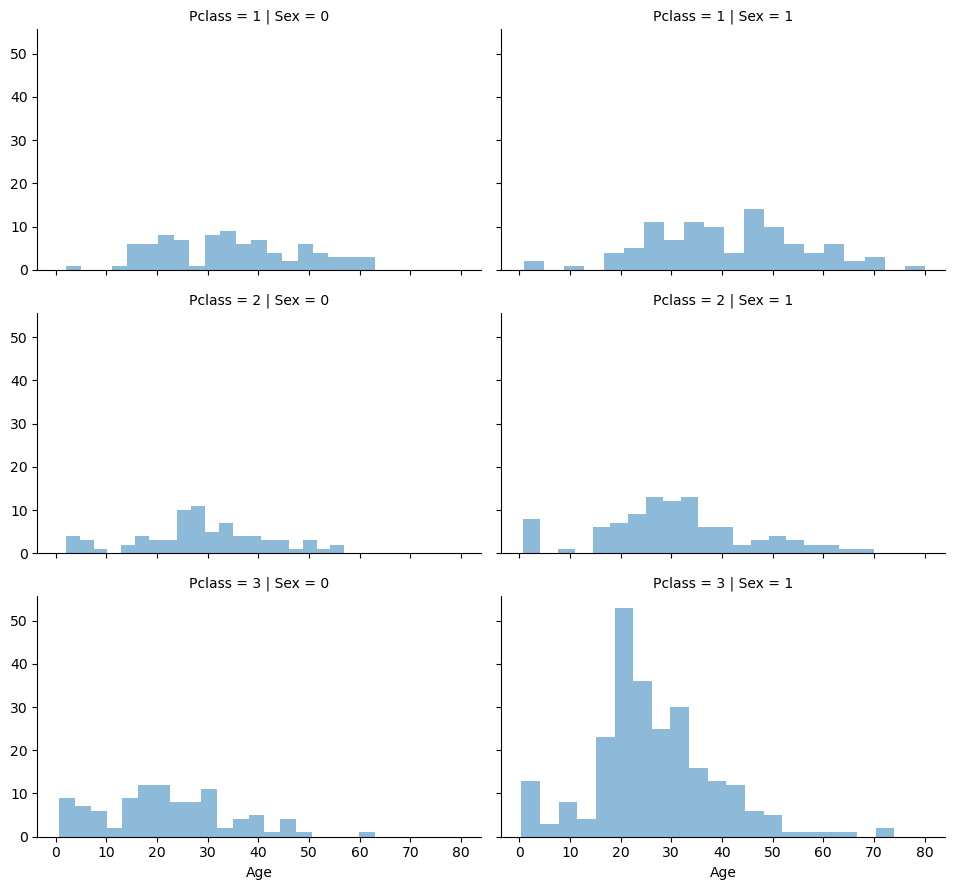

In [52]:
grid = sns.FacetGrid(df_train, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

In [53]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [54]:
dataset = df[:]
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
for i in range(0, 2):
    for j in range(0, 3):
        dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]        
df = dataset[:]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,1,22.0,1,0,7.2500,S,Mr
1,1.0,1,0,38.0,1,0,71.2833,C,Mrs
2,1.0,3,0,26.0,0,0,7.9250,S,Miss
3,1.0,1,0,35.0,1,0,53.1000,S,Mrs
4,0.0,3,1,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,25.0,0,0,8.0500,S,Mr
1305,NaN,1,0,39.0,0,0,108.9000,C,Rare
1306,NaN,3,1,38.5,0,0,7.2500,S,Mr
1307,NaN,3,1,25.0,0,0,8.0500,S,Mr


In [55]:
dataset = df_train[:]
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
for i in range(0, 2):
    for j in range(0, 3):
        dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]        
df_train = dataset[:]
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Rare
887,1,1,0,19.0,0,0,30.0000,S,Miss
888,0,3,0,21.5,1,2,23.4500,S,Miss
889,1,1,1,26.0,0,0,30.0000,C,Mr


In [56]:
dataset = df_test[:]
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
for i in range(0, 2):
    for j in range(0, 3):
        dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]        
df_test = dataset[:]
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,Q,Mr
1,3,0,47.0,1,0,7.0000,S,Mrs
2,2,1,62.0,0,0,9.6875,Q,Mr
3,3,1,27.0,0,0,8.6625,S,Mr
4,3,0,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,8.0500,S,Mr
414,1,0,39.0,0,0,108.9000,C,Rare
415,3,1,38.5,0,0,7.2500,S,Mr
416,3,1,24.0,0,0,8.0500,S,Mr


In [57]:
df_train['Embarked'].fillna(df_train['Embarked'].dropna().mode()[0], inplace = True)
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace = True)

In [58]:
df['Embarked'].fillna(df['Embarked'].dropna().mode()[0], inplace = True)
df['Fare'].fillna(df['Fare'].dropna().median(), inplace = True)

In [59]:
df_train['Embarked'].dropna().mode()[0]

'S'

In [60]:
df_test['Fare'].dropna().median()

14.4542

In [61]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [62]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

### Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [64]:
df['Embarked'].isna().sum()

0

In [65]:
df['Embarked'] = lbe.fit_transform(df['Embarked'])
df_train['Embarked'] = lbe.transform(df_train['Embarked'])
df_test['Embarked'] = lbe.transform(df_test['Embarked'])

In [66]:
df['Title'] = lbe.fit_transform(df['Title'])
df_train['Title'] = lbe.transform(df_train['Title'])
df_test['Title'] = lbe.transform(df_test['Title'])

In [67]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,4
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,21.5,1,2,23.4500,2,1
889,1,1,1,26.0,0,0,30.0000,0,2


### Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df[['Fare', 'Age']] = mms.fit_transform(df[['Fare', 'Age']])
df_train[['Fare', 'Age']] = mms.transform(df_train[['Fare', 'Age']])
df_test[['Fare', 'Age']] = mms.transform(df_test[['Fare', 'Age']])

In [69]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,0.273456,1,0,0.014151,2,2
1,1,1,0,0.473882,1,0,0.139136,0,3
2,1,3,0,0.323563,0,0,0.015469,2,1
3,1,1,0,0.436302,1,0,0.103644,2,3
4,0,3,1,0.436302,0,0,0.015713,2,2


### Splitting

In [70]:
X_train = df_train.drop(['Survived'], axis = 1)
y_train = df_train['Survived']

### Modelling

In [71]:
class_dict = {
    'LogisticRegression' : LogisticRegression(), 
    'SGDClassifier' : SGDClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'GaussianNB' : GaussianNB(),
    'LinearSVC' : LinearSVC(),
    'SVC' : SVC()
}

### Using cross_val_score

In [72]:
from sklearn.model_selection import cross_val_score

for key, model in class_dict.items():
    score_list = cross_val_score(model, X = X_train.values, y = y_train.values, cv = 10, scoring = 'f1')
    print(key)
    print("Scores : ", score_list)
    print('Mean of the scores', score_list.mean())
    print('-'*100)

LogisticRegression
Scores :  [0.71641791 0.70588235 0.66666667 0.7826087  0.73239437 0.6984127
 0.70967742 0.68852459 0.77419355 0.7761194 ]
Mean of the scores 0.7250897651208605
----------------------------------------------------------------------------------------------------
SGDClassifier
Scores :  [0.76056338 0.5        0.62857143 0.75609756 0.78787879 0.6
 0.75862069 0.70967742 0.48888889 0.76923077]
Mean of the scores 0.6759528924837186
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier
Scores :  [0.6        0.74626866 0.59375    0.72972973 0.79411765 0.74285714
 0.71641791 0.58064516 0.7826087  0.73239437]
Mean of the scores 0.7018789309949555
----------------------------------------------------------------------------------------------------
KNeighborsClassifier
Scores :  [0.67605634 0.74193548 0.59016393 0.80555556 0.75757576 0.73015873
 0.72131148 0.7        0.73015873 0.77142857]
Mean of the scores 0.7

### Using GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

##### LogisticRegression
* Logistic Regression is a useful model to run early in the workflow. 
* Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. 

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(df_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.58

* We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

* Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [75]:
coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Fare,0.401275
4,Parch,-0.047956
6,Embarked,-0.213738
7,Title,-0.242039
3,SibSp,-0.313158
0,Pclass,-1.100332
2,Age,-2.013651
1,Sex,-2.602272


In [76]:
lgr_params ={
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lgr = LogisticRegression()
grid_lgr = GridSearchCV(lgr, lgr_params, cv = 5)
grid_lgr.fit(X_train, y_train)
print('Parameters for best estimator : ', grid_lgr.best_estimator_)
best_lgr = grid_lgr.best_estimator_
score_list = cross_val_score(best_lgr, X = X_train.values, y = y_train.values, cv = 10, scoring = 'f1')
# print("Scores : ", score_list)
print('Mean of the scores', score_list.mean())

Parameters for best estimator :  LogisticRegression(C=0.1, penalty='none', solver='newton-cg')
Mean of the scores 0.7312811331541053


#### DecisionTreeClassifier
* This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). 
* Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. 
* Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [77]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(df_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.32

In [78]:
dtc_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc = DecisionTreeClassifier()
grid_dtc = GridSearchCV(dtc, dtc_params, cv = 5)
grid_dtc.fit(X_train, y_train)
print('Parameters for best estimator : ', grid_dtc.best_estimator_)
best_dtc = grid_dtc.best_estimator_
score_list = cross_val_score(best_dtc, X = X_train.values, y = y_train.values, cv = 10, scoring = 'f1')
# print("Scores : ", score_list)
print('Mean of the scores', score_list.mean())

Parameters for best estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)
Mean of the scores 0.7405570808574935


#### KNeighborsClassifier
* In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. 
* A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 
* If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [79]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(df_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

87.21

In [80]:
knnc_params = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

knnc = KNeighborsClassifier()
grid_knnc = GridSearchCV(knnc, knnc_params, cv = 5)
grid_knnc.fit(X_train, y_train)
print('Parameters for best estimator : ', grid_knnc.best_estimator_)
best_knnc = grid_knnc.best_estimator_
score_list = cross_val_score(best_knnc, X = X_train.values, y = y_train.values, cv = 10, scoring = 'f1')
# print("Scores : ", score_list)
print('Mean of the scores', score_list.mean())

Parameters for best estimator :  KNeighborsClassifier(n_neighbors=7, p=1)
Mean of the scores 0.7401756912442395


#### RandomForestClassifier
* The next model Random Forests is one of the most popular. 
* Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [81]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(df_test)
# random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.32

In [82]:
rfc_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, rfc_params, cv = 5)
grid_rfc.fit(X_train, y_train)
print('Parameters for best estimator : ', grid_rfc.best_estimator_)
best_rfc = grid_rfc.best_estimator_
score_list = cross_val_score(best_rfc, X = X_train.values, y = y_train.values, cv = 10, scoring = 'f1')
# print("Scores : ", score_list)
print('Mean of the scores', score_list.mean())

Parameters for best estimator :  RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150)
Mean of the scores 0.7676983706202285


#### GaussianNB
* In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. 
* Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 

In [83]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(df_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.91

In [84]:
gnb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gnb = GaussianNB()
grid_gnb = GridSearchCV(gnb, gnb_params, cv = 5)
grid_gnb.fit(X_train, y_train)
print('Parameters for best estimator : ', grid_gnb.best_estimator_)
best_gnb = grid_gnb.best_estimator_
score_list = cross_val_score(best_gnb, X = X_train.values, y = y_train.values, cv = 10, scoring = 'f1')
# print("Scores : ", score_list)
print('Mean of the scores', score_list.mean())

Parameters for best estimator :  GaussianNB()
Mean of the scores 0.7391691028666472


#### SVC
* Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 
* Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.


In [85]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(df_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.61

In [86]:
svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}
svc = SVC()
grid_svc = GridSearchCV(svc, svc_params, cv = 5)
grid_svc.fit(X_train, y_train)
print('Parameters for best estimator : ', grid_svc.best_estimator_)
best_svc = grid_svc.best_estimator_
score_list = cross_val_score(best_svc, X = X_train.values, y = y_train.values, cv = 10, scoring = 'f1')
# print("Scores : ", score_list)
print('Mean of the scores', score_list.mean())

Parameters for best estimator :  SVC(C=1)
Mean of the scores 0.7699320659175155


### Model evaluation
* We can now rank our evaluation of all the models to choose the best one for our problem. 
* While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [87]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.32
5,Decision Tree,98.32
1,KNN,87.21
0,Support Vector Machines,83.61
2,Logistic Regression,80.58
4,Naive Bayes,79.91
